In [357]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import SGDRegressor
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV


# Assignment 2 - Regression
### Predict the TOTAL COMPENSATION for this year. 

The data file provided is a salary survey for tech workers in Europe. We want to predict the total amount of compensation they bring in each year, based off of the details of their work. 

Some notes that will be important:
<ul>
    <li>The total compensation will need to be constructed, there is a column for salary, "Yearly brutto salary (without bonus and stocks) in EUR", as well as a column for bonus compensation, "Yearly bonus + stocks in EUR". 
    <li>Some categorical variables will need some work, and there isn't generally an exact answer. The main concern is things with categories that have a bunch of values with a very small count. For example, if there is only 1 person in City X, then that value likely needs to be addressed. We don't want it encoded into a new column of one 1 and thousands of 0s. 
    <li>There is an article exploring some of the data here: https://www.asdcode.de/2021/01/it-salary-survey-december-2020.html
    <li>Imputation and a bit of data manipulation will be required. 
    <li>Use any regression method you'd like. Some ones are closely related to what we've done, you may want to look at them, e.g. ExtraTreesRegressor. 
    <li>Initial accurracy, and potentially final accuracy, may not be great. When I made a plain model will little optimization the errors were large and the R2 was low. There is lots of room for optimization. 
    <li>Research challenge - try some work on the target, look into TransformedTargetRegressor and see if that helps. Recall in stats when we had skewed distributions... Maybe it helps, maybe it doesn't. 
    <li>EDA and data prep are up to you - you'll probably need to do a little exploring to figure out what cleanup is needed. When I did it, I did things kind of iteratively when I did it. For example, look at the value counts, figure out how to treat the different categories, clean something up, look at the results, potentially repeat if needed. After you figure out what needs to be done, you may be able to take some of those steps and incorporate them into a pipeline to be cleaner....
    <li><b>CRITICAL - Please make sure your code runs with RUN ALL. It should load the data that you're given, do all the processing, and spit out results. Comment out or remove anything that you've cleaned up and don't need - e.g. if you scaled a value manually, then moved that into a pipeline, don't leave the original scaling code active when the file is run.</b>
</ul>

### Details and Deliverables

You'll need to build code to produce the predictions. In particular, there's a few things that'll be marked:
<ul>
    <li>Please add a markdown cell at the bottom, and put in a few notes addressing the following:
    <ul>
        <li> Accuracy of your models with/without feature selection. Include both train/test for each. Please use R2 and RMSE. 
        <li> Feature Selection - Please identify what you did for feature selection. No need for a long explaination, something along the lines of "I did X, and the result was that 4 features were removed". Try at least 2 things. 
        <li> Hyperparameter Changes / Grid Search Improvements. What did you try, and why. Similar explaination to above, short. 
        <li> Overall this section should be roughly as long as this intro block - just outline what the results were, what you did to improve, and the results after. 
        <li> If you could use titles/bullet points I'd really appreciate it. 
    </ul>
    <li>Grade Breakdown:
    <ul>
        <li> Code is readable, there are comments: 20%
        <li> Explaination as defined above: 60% (20% each point)
        <li> Accuracy: 20% As compared to everyone else. This will be generously graded, I won't be surprised if overall accuracy is low for most people. 
    </ul>
</ul>

In [358]:
#Load Data
df = pd.read_csv("data/Euro_Salary.csv")
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Timestamp,1253,1248,24/11/2020 13:55:19,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,1226.0,NaN,NaN,NaN,32.509788,5.663804,20.0,29.0,32.0,35.0,69.0
Gender,1243,3,Male,1049,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City,1253,119,Berlin,681,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Position,1247,148,Software Engineer,387,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total years of experience,1237,48,10,138,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Years of experience in Germany,1221,53,2,195,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Seniority level,1241,24,Senior,565,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Your main technology / programming language,1126,256,Java,184,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Other technologies/programming languages you use often,1096,562,Javascript / Typescript,44,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [359]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1253 entries, 0 to 1252
Data columns (total 18 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Timestamp                                               1253 non-null   object 
 1   Age                                                     1226 non-null   float64
 2   Gender                                                  1243 non-null   object 
 3   City                                                    1253 non-null   object 
 4   Position                                                1247 non-null   object 
 5   Total years of experience                               1237 non-null   object 
 6   Years of experience in Germany                          1221 non-null   object 
 7   Seniority level                                         1241 non-null   object 
 8   Your main technology / programming lan

In [360]:
df["Total years of experience"]=pd.to_numeric(df["Total years of experience"],downcast='float',errors='coerce')
df["Years of experience in Germany"]=pd.to_numeric(df["Years of experience in Germany"],downcast='float',errors='coerce')
df['Yearly brutto salary (without bonus and stocks) in EUR']=pd.to_numeric(df['Yearly brutto salary (without bonus and stocks) in EUR'],downcast='float',errors='coerce')
df['Yearly bonus + stocks in EUR']=pd.to_numeric(df['Yearly bonus + stocks in EUR'],downcast='float',errors='coerce')
df['Number of vacation days']=pd.to_numeric(df['Number of vacation days'],downcast='float',errors='coerce')
df['Target']=df['Yearly brutto salary (without bonus and stocks) in EUR']+df['Yearly bonus + stocks in EUR']


In [361]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1226.0,3.250979e+01,5.663804e+00,20.0,29.0,32.0,35.0,6.900000e+01
Total years of experience,1230.0,9.078130e+00,1.190128e+01,0.0,5.0,8.0,12.0,3.830000e+02
Years of experience in Germany,1194.0,3.757957e+00,3.656554e+00,0.0,1.0,3.0,5.0,3.000000e+01
Yearly brutto salary (without bonus and stocks) in EUR,1253.0,8.027904e+07,2.825096e+09,10001.0,58800.0,70000.0,80000.0,1.000000e+11
Yearly bonus + stocks in EUR,823.0,6.096878e+06,1.742885e+08,0.0,0.0,5000.0,20000.0,5.000000e+09
Number of vacation days,1172.0,2.834855e+01,1.076001e+01,0.0,27.0,28.0,30.0,3.650000e+02
Target,823.0,6.777656e+06,1.917144e+08,10001.0,65000.0,79000.0,105000.0,5.500000e+09


In [362]:
def find_categorical_numerical(df):
    categorical = []
    numerical = []
    for col in df.columns:
        if df[col].dtype == 'object':
            categorical.append(col)
        else:
            numerical.append(col)
    return categorical, numerical

In [363]:
categorical, numerical = find_categorical_numerical(df)

In [364]:
# Categorical data is 

print("categorical Data:")
categorical

categorical Data:


['Timestamp',
 'Gender',
 'City',
 'Position ',
 'Seniority level',
 'Your main technology / programming language',
 'Other technologies/programming languages you use often',
 'Employment status',
 'Сontract duration',
 'Main language at work',
 'Company size',
 'Company type']

In [365]:
# Numerical data is :

print("Numerical data:")
numerical

Numerical data:


['Age',
 'Total years of experience',
 'Years of experience in Germany',
 'Yearly brutto salary (without bonus and stocks) in EUR',
 'Yearly bonus + stocks in EUR',
 'Number of vacation days',
 'Target']

In [366]:
def replace_comma(df, column_name):
    for i, row in df.iterrows():
        value = row[column_name]
        if isinstance(value, str):
            df.at[i, column_name] = value.replace(',','.')
        else:
            df.at[i, column_name] = value

In [367]:
for col in numerical:
    replace_comma(df,col)

In [368]:
#Imputing for categorical variables, filling the missing values with the mode of the data.
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
df['Position ']=df['Position '].fillna(df['Position '].mode()[0])
df['Seniority level']=df['Seniority level'].fillna(df['Seniority level'].mode()[0])
df['Your main technology / programming language']=df['Your main technology / programming language'].fillna(df['Your main technology / programming language'].mode()[0])
df['Other technologies/programming languages you use often']=df['Other technologies/programming languages you use often'].fillna(df['Other technologies/programming languages you use often'].mode()[0])
df['Employment status']=df['Employment status'].fillna(df['Employment status'].mode()[0])
df['Сontract duration']=df['Сontract duration'].fillna(df['Сontract duration'].mode()[0])
df['Main language at work']=df['Main language at work'].fillna(df['Main language at work'].mode()[0])
df['Company size']=df['Company size'].fillna(df['Company size'].mode()[0])
df['Company type']=df['Company type'].fillna(df['Company type'].mode()[0])
df['Age']=df['Age'].fillna(df['Age'].mean())
df['Yearly brutto salary (without bonus and stocks) in EUR']=df['Yearly brutto salary (without bonus and stocks) in EUR'].fillna(df['Yearly brutto salary (without bonus and stocks) in EUR'].mean())
df['Yearly bonus + stocks in EUR']=df['Yearly bonus + stocks in EUR'].fillna(df['Yearly bonus + stocks in EUR'].mean())
df['Number of vacation days']=df['Number of vacation days'].fillna(df['Number of vacation days'].mean())
df["Years of experience in Germany"]=df["Years of experience in Germany"].fillna(df["Years of experience in Germany"].mean())
df["Target"]=df["Target"].fillna(df["Target"].mean())
df['Total years of experience']=df['Total years of experience'].fillna(df['Total years of experience'].mean())

In [369]:
# Drop the timestamp as it is irrelevant 
df=df.drop(['Timestamp'],axis=1)

In [370]:
#Defining outliers
def outlier_replacement(df, col, q1=0.1, q3=0.95):
    q1 = df[col].quantile(q1)
    q3 = df[col].quantile(q3)
    IQR= q3 - q1
    upper = q3 + 1.5 * IQR
    lower = q1 - 1.5 * IQR
    df.loc[(df[col] < lower), col] = lower
    df.loc[(df[col] > (upper)), col] = upper
for col in numerical:
    outlier_replacement(df, col)

In [371]:
def replace_low_freq(d, col, threshold=10, replacement='other'):
    value_counts = d[col].value_counts() # Specific column 
    to_remove = value_counts[value_counts <= threshold].index
    tmp = d[col].replace(to_replace=to_remove, value=replacement)
    return tmp

In [372]:
df["Your main technology / programming language"] = replace_low_freq(df, "Your main technology / programming language", 10, "Other")
df["Your main technology / programming language"].value_counts()

Other         377
Java          311
Python        164
PHP            56
C++            38
JavaScript     34
Javascript     31
C#             30
python         26
Swift          24
Scala          24
Go             23
Kotlin         22
Python         21
Ruby           19
TypeScript     14
SQL            14
.NET           13
JS             12
Name: Your main technology / programming language, dtype: int64

In [373]:
df["Your main technology / programming language"].replace({"Javascript": "JavaScript", "python":"Python"}, inplace=True)
df["Your main technology / programming language"].value_counts()

Other         377
Java          311
Python        190
JavaScript     65
PHP            56
C++            38
C#             30
Swift          24
Scala          24
Go             23
Kotlin         22
Python         21
Ruby           19
TypeScript     14
SQL            14
.NET           13
JS             12
Name: Your main technology / programming language, dtype: int64

In [374]:
df['Other technologies/programming languages you use often'].value_counts()

Javascript / Typescript                                                                   201
Python                                                                                     37
SQL                                                                                        31
AWS, Docker                                                                                16
Kotlin                                                                                     15
                                                                                         ... 
Python, Ruby, Java / Scala, Go, Rust, AWS, Kubernetes, Docker, Terraform, helm, packer      1
Kotlin, SQL, AWS, Kubernetes, Docker                                                        1
Python, R, Go                                                                               1
C/C++, PHP, SQL                                                                             1
Python, AWS, Kubernetes, Docker, terraform, ansible         

In [375]:
df["Other technologies/programming languages you use often"] = replace_low_freq(df, "Other technologies/programming languages you use often", 10, "Other")
df["Other technologies/programming languages you use often"].value_counts()

Other                                        891
Javascript / Typescript                      201
Python                                        37
SQL                                           31
AWS, Docker                                   16
Kotlin                                        15
C/C++                                         13
Swift                                         13
Python, SQL                                   13
Javascript / Typescript, SQL, AWS, Docker     12
Python, C/C++                                 11
Name: Other technologies/programming languages you use often, dtype: int64

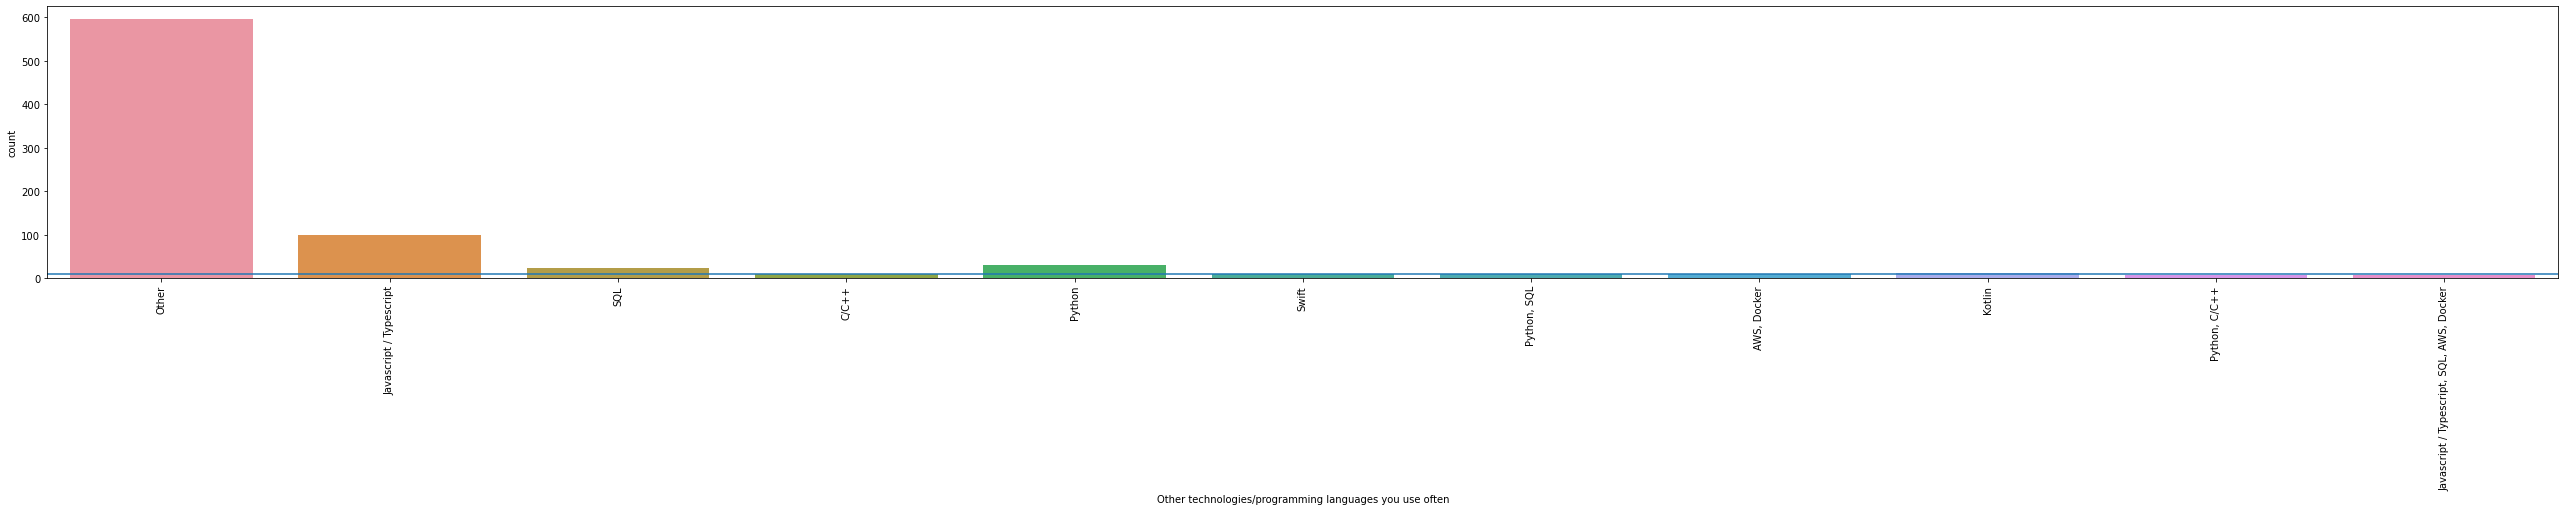

In [377]:
# Construct a temporary dataset with things that have > 2 records
# remove outliers
df_tmp = df[df.groupby("Other technologies/programming languages you use often")["Other technologies/programming languages you use often"].transform('size') > 2]
df_tmp = df_tmp[df_tmp["Target"] < 250000]

plt.figure(figsize=(45,5))
ax = sns.countplot(x="Other technologies/programming languages you use often", data=df_tmp)
ax.axhline(10)
ax.tick_params(axis='x', rotation=90)

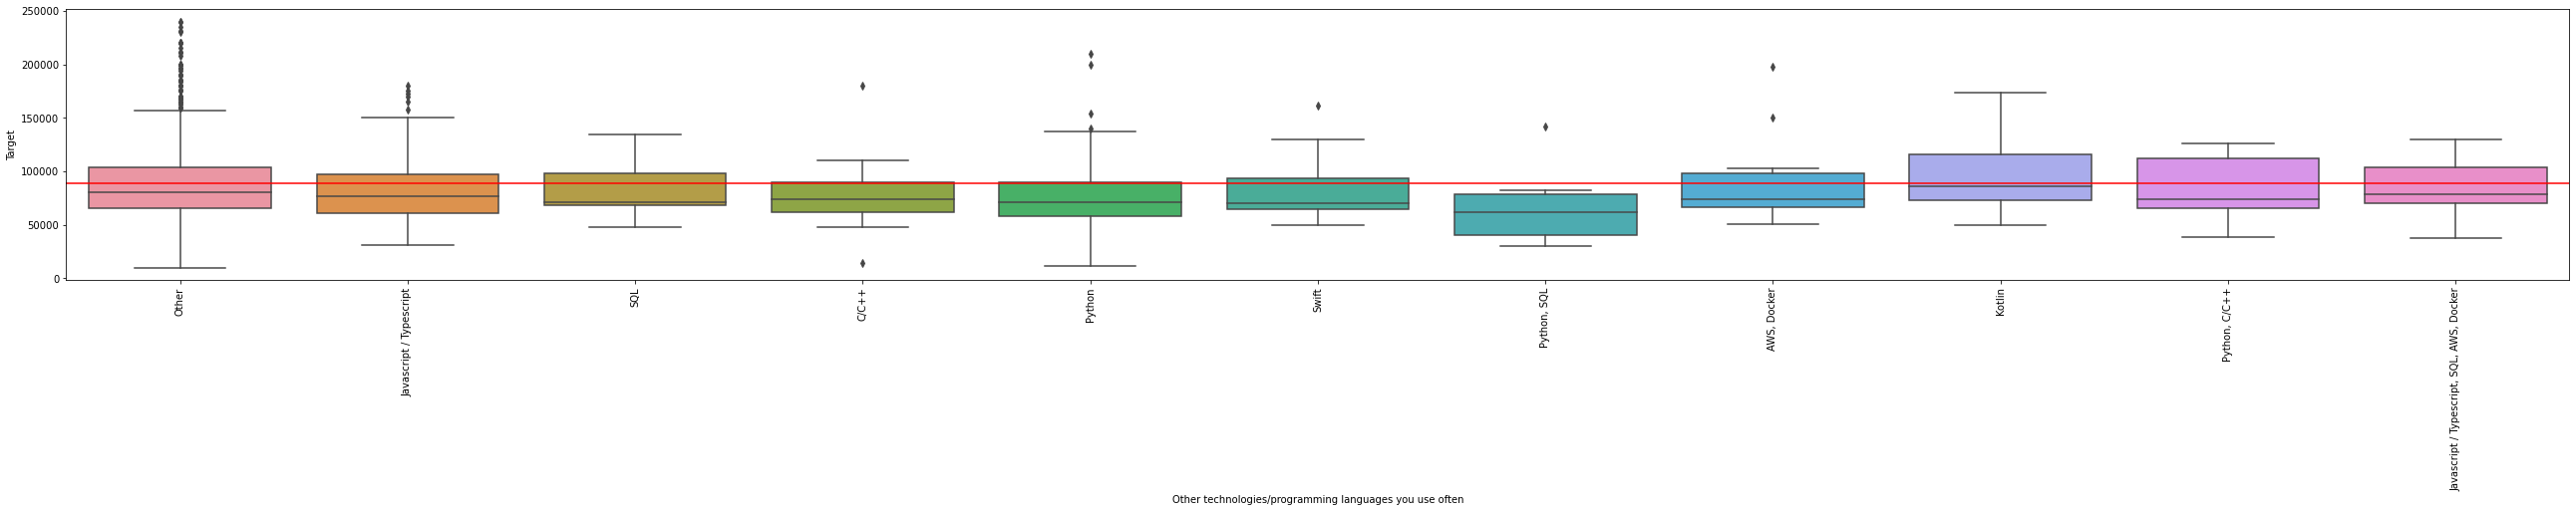

In [379]:
plt.figure(figsize=(45,5))
ax = sns.boxplot(x="Other technologies/programming languages you use often", y="Target", data=df_tmp)
ax.axhline(df_tmp["Target"].mean(), color="red")
ax.tick_params(axis='x', rotation=90)

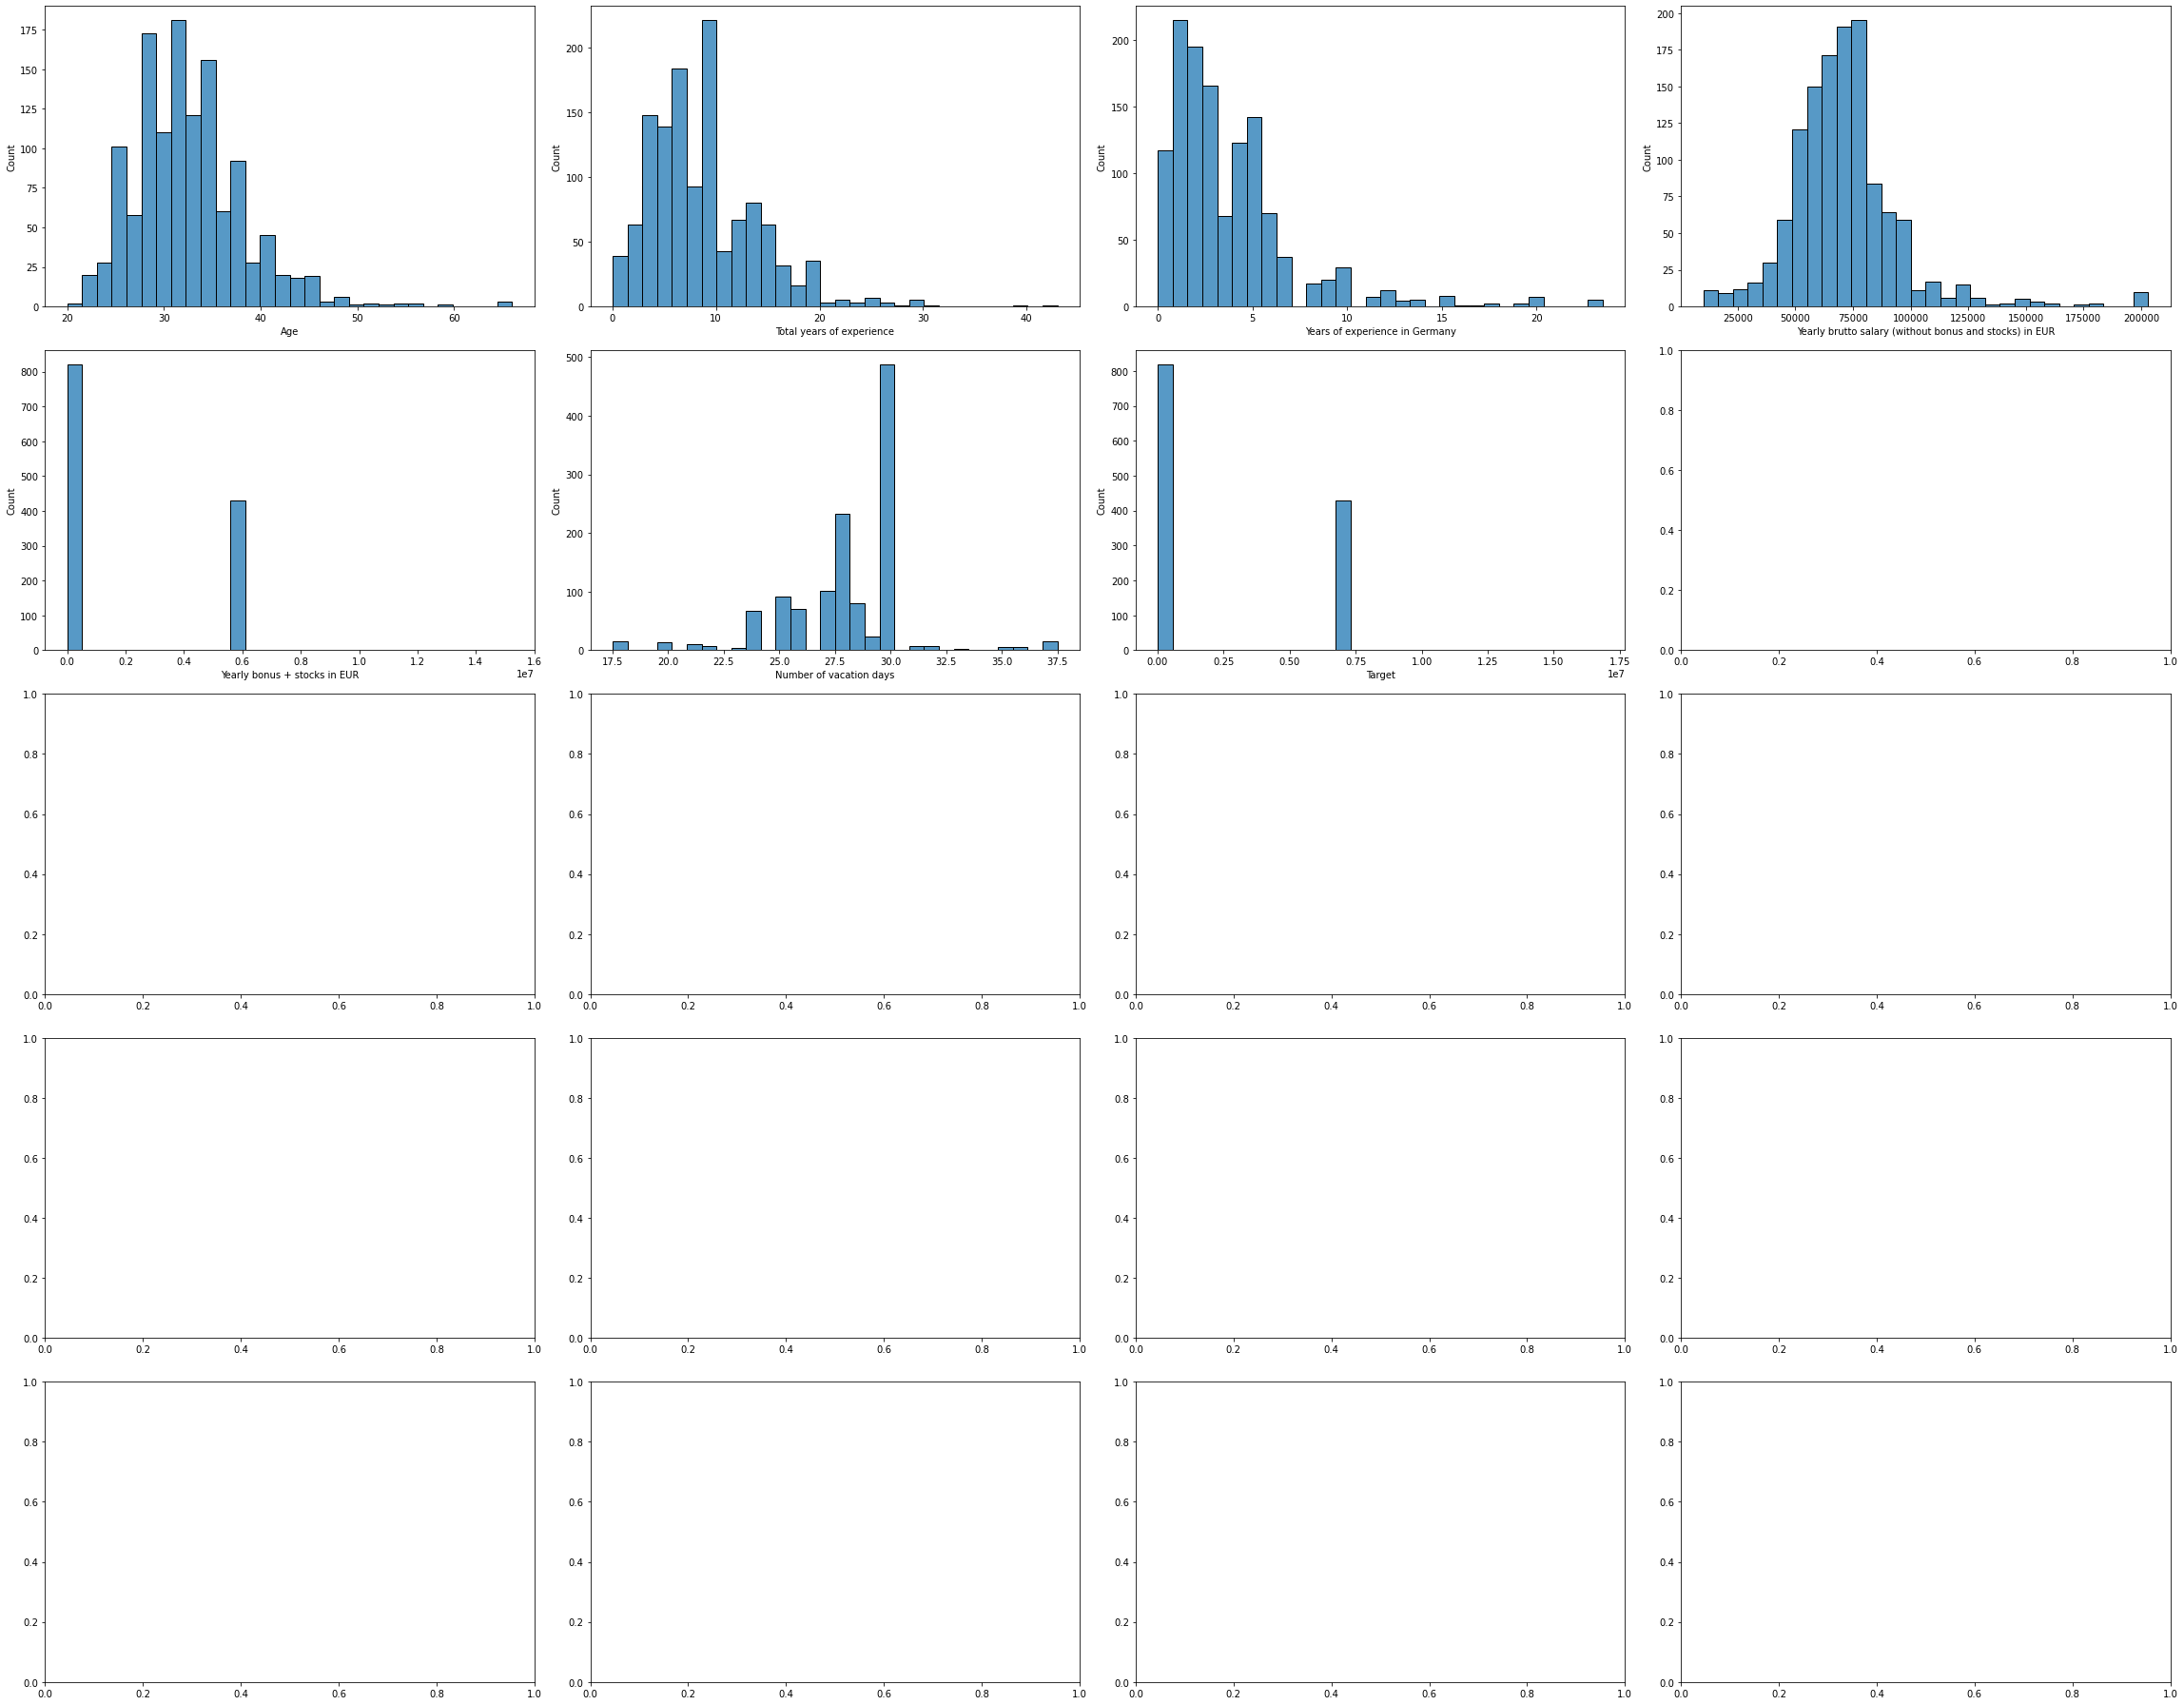

In [380]:
num_cols = list(numerical)
nr_rows = 5
nr_cols = 4

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*8,nr_rows*5))

for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        i = r*nr_cols+c
        if i < len(num_cols):
            sns.histplot(x=num_cols[i], data=df, ax = axs[r][c], bins=30)
    
plt.tight_layout()    
plt.show()

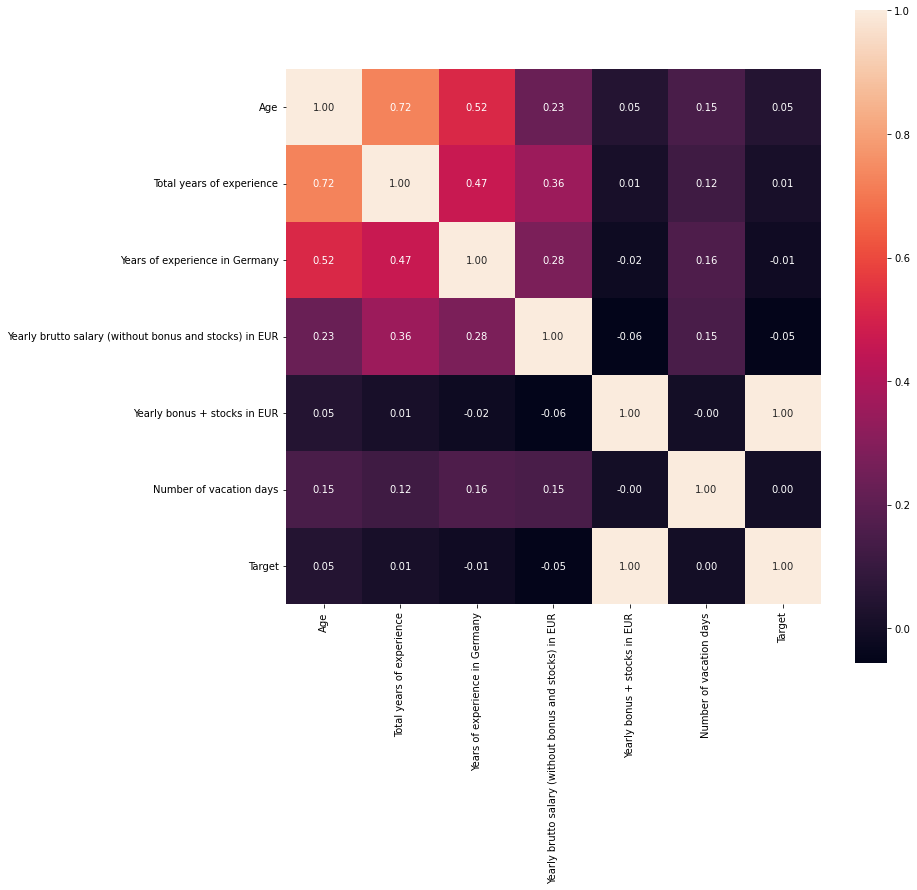

In [381]:
cm=df[numerical].corr()
fig, ax = plt.subplots(figsize=(12,12))    
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10})
plt.show()

c:\Users\taraz\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
c:\Users\taraz\anaconda3\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


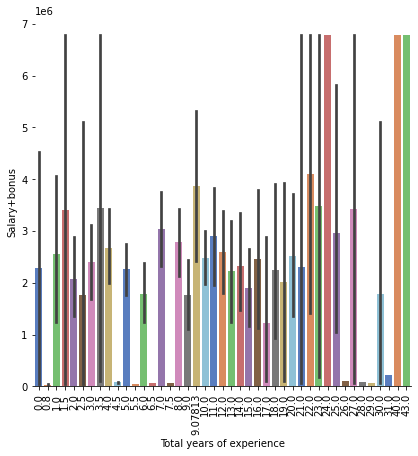

In [388]:
g=sns.factorplot(x='Total years of experience',y='Target', data=df,kind="bar",size = 6,palette = "muted" )
g.despine(left=True)
g = g.set_ylabels("Salary+bonus")
g.set_xticklabels(rotation=90)

c:\Users\taraz\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
c:\Users\taraz\anaconda3\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


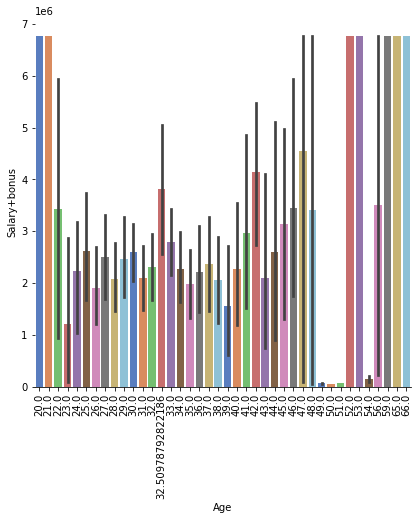

In [389]:
g  = sns.factorplot(x="Age",y="Target",data=df,kind="bar",size = 6,palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Salary+bonus")
g.set_xticklabels(rotation=90)

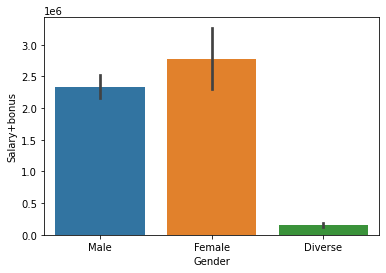

In [386]:
g = sns.barplot(x="Gender",y="Target",data=df)
g = g.set_ylabel("Salary+bonus")


c:\Users\taraz\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
c:\Users\taraz\anaconda3\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


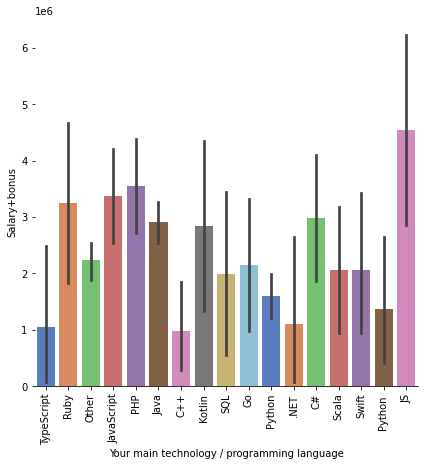

In [390]:
g = sns.factorplot(x='Your main technology / programming language',y="Target",data=df,kind="bar", size = 6 ,
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Salary+bonus")
g.set_xticklabels(rotation=90)

c:\Users\taraz\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
c:\Users\taraz\anaconda3\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


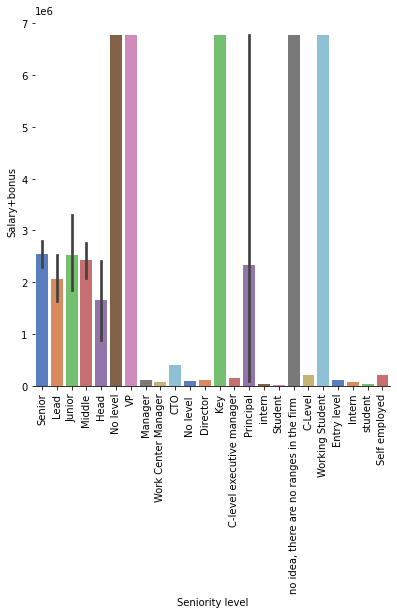

<Figure size 576x360 with 0 Axes>

In [391]:
g = sns.factorplot(x='Seniority level',y="Target",data=df,kind="bar", size = 6 ,palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Salary+bonus")
fig = plt.figure(figsize=(8, 5))
g.set_xticklabels(rotation=90)


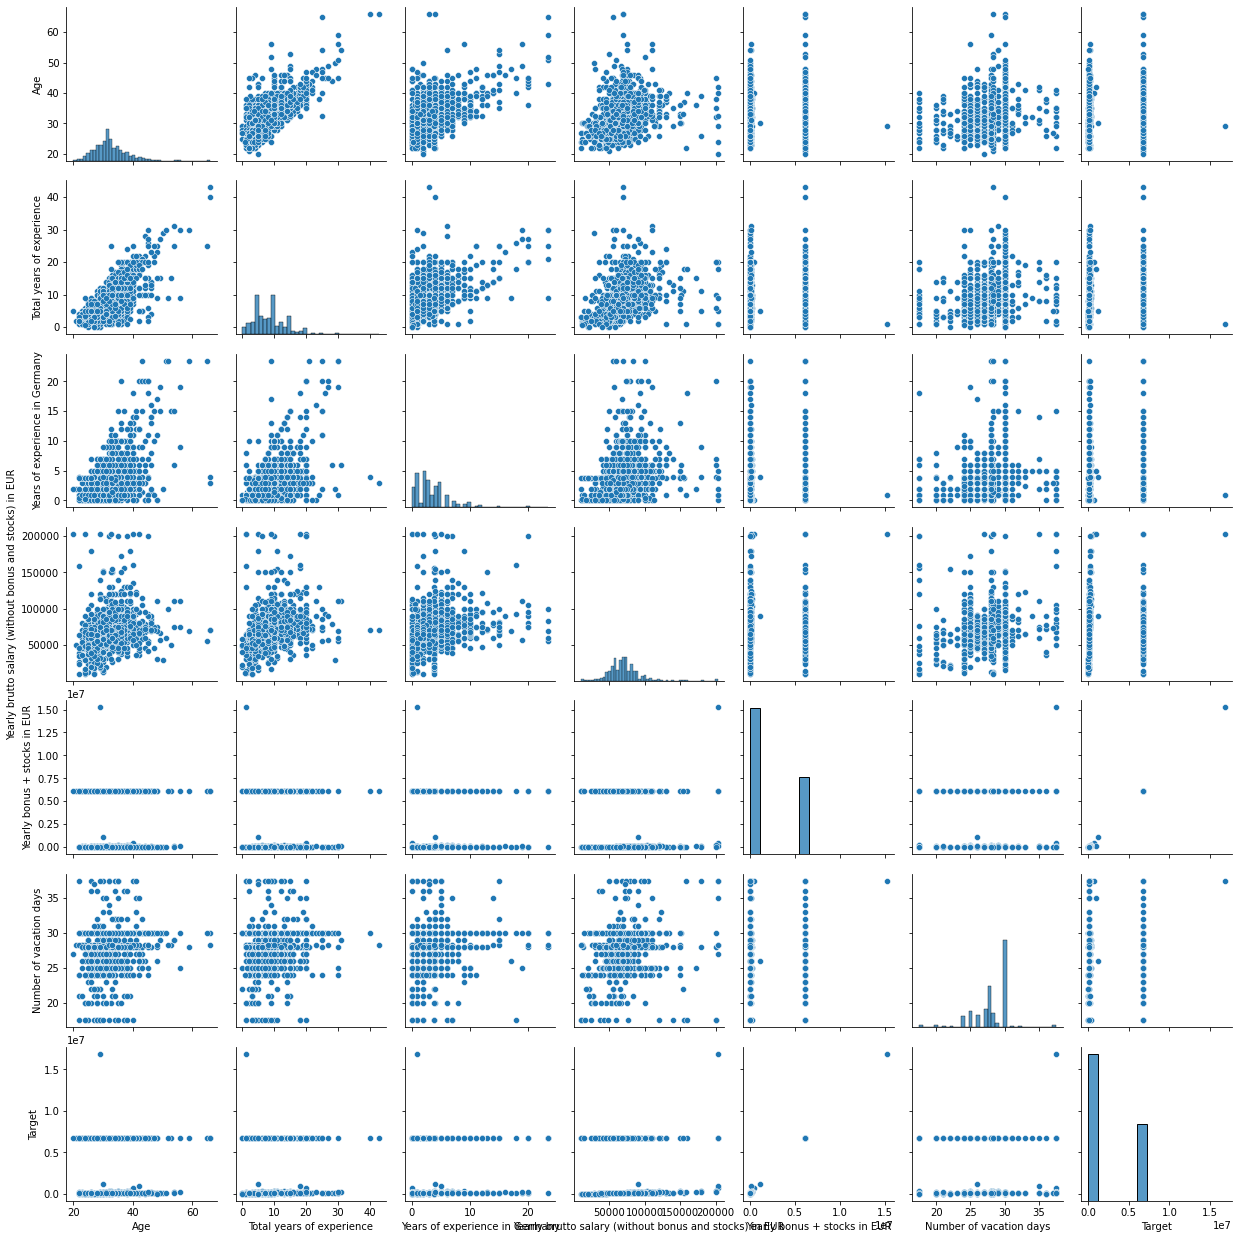

In [ ]:
sns.pairplot(df)

<AxesSubplot:xlabel='Yearly brutto salary (without bonus and stocks) in EUR', ylabel='Density'>

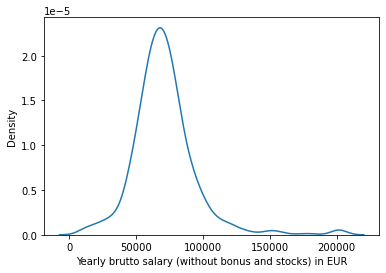

In [ ]:
sns.kdeplot(data=df, x="Yearly brutto salary (without bonus and stocks) in EUR")

In [392]:
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest, mutual_info_regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix
from sklearn.impute import SimpleImputer


# Select the best features using mutual information
#df = pd.get_dummies(df, drop_first=True)
y = df["Target"]
X = df.drop(columns={"Target","Yearly bonus + stocks in EUR","Yearly brutto salary (without bonus and stocks) in EUR"})

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Define the categorical and numerical features
numeric_features = X.select_dtypes(exclude="object").columns
numeric_transformer=Pipeline(steps=[
    ("imputer", SimpleImputer(strategy='median')),
    ("Scaler", MinMaxScaler())])
categorical_features = X.select_dtypes(include="object").columns
categorical_transformer=Pipeline(steps=[
    ('encoder',OneHotEncoder(handle_unknown="ignore"))
])

# Apply one-hot encoding to the categorical features and keep the numerical features as they are
preprocessor = ColumnTransformer(remainder='drop',
    transformers=[
        ('num',numeric_transformer,numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])


In [ ]:
model=DecisionTreeRegressor()
pipeline_steps = [('pre', preprocessor),('Reg', model) ]
clf = Pipeline(pipeline_steps)
clf=clf.fit(X_train,y_train)
print(model.get_depth())
print("Testing score: ", clf.score(X_test,y_test))
y_pred = clf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

38
Testing score:  -1.0040051335613902
Mean Squared Error: 19947309929231.016


In [ ]:
from sklearn.feature_selection import RFECV
model3 = RandomForestRegressor(n_jobs=-1)
pipe_model3 = DecisionTreeRegressor()

min_features_to_select3 = 100  # Minimum number of features to consider
rfecv_pipe3 = RFECV(
    estimator=pipe_model3,
    step=1,
    cv=3,
    min_features_to_select=min_features_to_select3,
)


pipeline_steps3 = [('pre', preprocessor),
                    ("fs", rfecv_pipe3),
                    ('model', model3)]
pipe3 = Pipeline(pipeline_steps3)

for_para={
    'model__max_depth':np.arange(5,20,2),
    'model__max_samples':np.arange(0.3,0.7,0.1),
    }
clf3=GridSearchCV(estimator=pipe3,param_grid=for_para, n_jobs=-1, cv=3)
clf3.fit(X_train, y_train)
best3=clf3.best_estimator_
print(best3.score(X_test,y_test))
score = best3.score(X_test, y_test.ravel())
print(f"R-squared score: {score:.2f}")
y_pred = best3.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE',rmse)
best3


0.08423766995385329
R-squared score: 0.08
RMSE 3019146.1748962183


Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('Scaler',
                                                                   MinMaxScaler())]),
                                                  Index(['Age', 'Total years of experience', 'Years of experience in Germany',
       'Number of vacation days'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Gender'...
       'Your main technology / programming language',
       'Other technolo

In [395]:
from sklearn.feature_selection import SelectKBest, f_regression
# Define the feature selection step
feature_selector = SelectKBest(f_regression)

model = RandomForestRegressor()


# Create the pipeline with pre-processing, feature selection, and model steps
pipeline = Pipeline(steps=[('preprocessor', preprocessor), 
                           ('feature_selector', feature_selector),
                           ('model', model)])


# Define the hyperparameters for grid search
param_grid = {
              'model__max_depth': [5, 8, 10, 12, 15, 20],
              'model__max_features':[1,2,3,4,5],
              "model__min_samples_split": [8, 15, 20, 25, 35, 45],
             "model__n_estimators": [25,75]}


grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=5)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Evaluate the model on the testing data
score = grid_search.score(X_test, y_test.ravel())
print(f"R-squared score: {score:.2f}")
y_pred = grid_search.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE',rmse)
best4=grid_search.best_estimator_
best4.score(X_test,y_test.ravel())

R-squared score: 0.10
RMSE 2992801.8917024676


0.10014935232389355

# Answers and Explainations
(Expand/modify as needed)

### Results

### Feature Selection Activities

### Hyperparameter Changes